In [72]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import tensorflow_hub as hub
import cv2

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [12]:
mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
inception_v3 = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"

classifier_model = mobilenet_v2

In [13]:
IMAGE_SHAPE + (3,)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE+(3,))
])

In [14]:
import os
print(os.getcwd())

D:\Jy


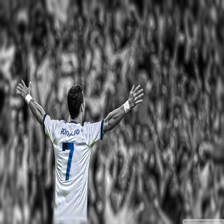

In [15]:
from PIL import Image

# Open an image
Ronaldo = Image.open(r'C:\Users\mrwiz\Downloads\435310.jpg').resize(IMAGE_SHAPE)

# Perform operations on the image
Ronaldo


In [16]:
Ronaldo = np.array(Ronaldo)/255.0
Ronaldo.shape

(224, 224, 3)

In [17]:
Ronaldo[np.newaxis, ...].shape

(1, 224, 224, 3)

In [19]:
result=classifier.predict(Ronaldo[np.newaxis, ...])
result.shape

1/1 [==============================] - 0s 54ms/step


(1, 1001)

In [21]:
predicted_class = np.argmax(result)
predicted_class

417

In [51]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 43s 0us/step


In [52]:
data_dir

'.\\datasets\\flower_photos'

In [53]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [54]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [55]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [58]:
roses=list(data_dir.glob('roses/*.jpg'))[:5]
roses

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

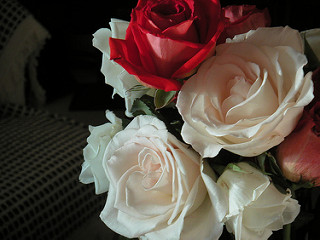

In [59]:
Image.open(str(roses[1]))

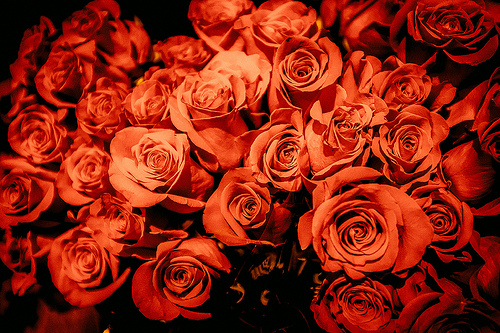

In [60]:
Image.open(str(roses[2]))

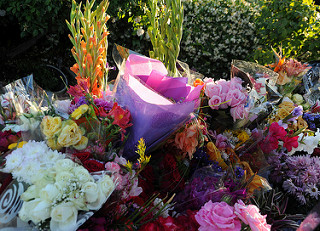

In [61]:
Image.open(str(roses[3]))

In [63]:
dandelion=list(data_dir.glob('dandelion/*.jpg'))[:5]
dandelion

[WindowsPath('datasets/flower_photos/dandelion/10043234166_e6dd915111_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10200780773_c6051a7d71_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10294487385_92a0676c7d_m.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10437652486_aa86c14985.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10443973_aeb97513fc_m.jpg')]

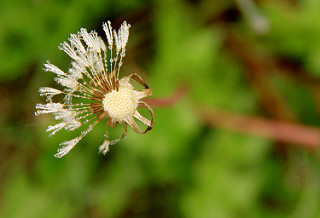

In [64]:
Image.open(str(dandelion[1]))

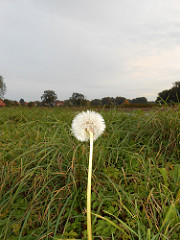

In [65]:
Image.open(str(dandelion[2]))

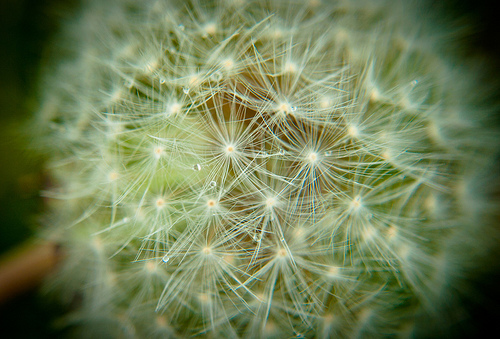

In [66]:
Image.open(str(dandelion[3]))

In [67]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [68]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [69]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [70]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [74]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [75]:
img.shape

(240, 179, 3)

In [76]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [77]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [78]:
X = np.array(X)
y = np.array(y)

In [ ]:
#TRAIN TEST SPLIT

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
#PREPROCCESING SCALE IMAGE

In [81]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
#MAKE PREDICTIONS USING PRE-TRAINED MODEL ON NEW FLOWERS DATASET

In [82]:
X[0].shape

(224, 224, 3)

In [83]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [90]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

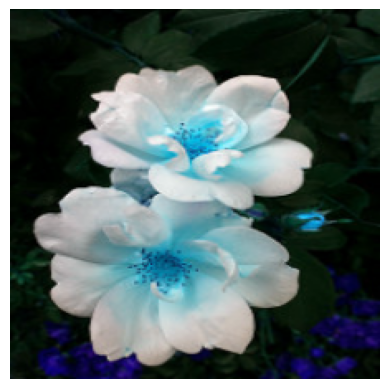

In [91]:
plt.axis('off')
plt.imshow(X[0])

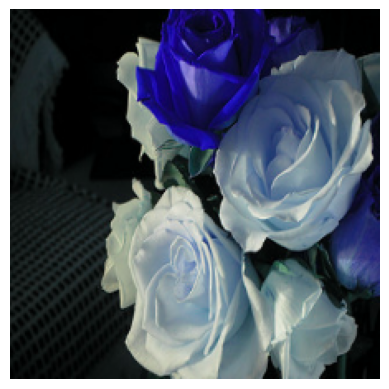

In [92]:
plt.axis('off')
plt.imshow(X[1])

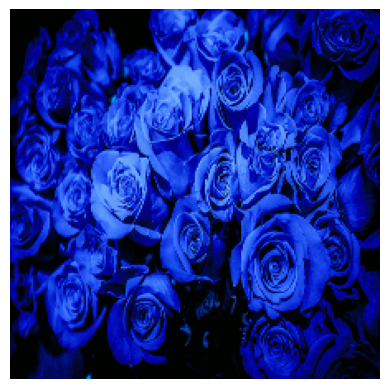

In [93]:
plt.axis('off')
plt.imshow(X[2])

In [94]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 1s/step


array([795, 880, 795], dtype=int64)

In [99]:
image_labels[795]

NameError: name 'image_labels' is not defined

In [96]:
#TAKE PRE-TRAINED MODEL AND RETRAIN IT USING FLOWERS IMAGES            

In [100]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [101]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [102]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 61s 644ms/step - loss: 0.7187 - acc: 0.7398
Epoch 2/5
86/86 [==============================] - 56s 647ms/step - loss: 0.3869 - acc: 0.8648
Epoch 3/5
86/86 [==============================] - 56s 656ms/step - loss: 0.3062 - acc: 0.8993
Epoch 4/5
86/86 [==============================] - 67s 780ms/step - loss: 0.2624 - acc: 0.9190
Epoch 5/5
86/86 [==============================] - 61s 713ms/step - loss: 0.2185 - acc: 0.9379


In [103]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 21s 668ms/step - loss: 0.3584 - acc: 0.8715


[0.3584045469760895, 0.8714597225189209]